
Here we would like to perform some analysis with the U19 pipeline.

First thing first, let's **import the U19 pipeline schemas as virtual module**, and a few other useful packages.

In [1]:
import datajoint as dj
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime
lab = dj.create_virtual_module('lab', 'U19_lab') # the first argument here is the __name__ of the virtual module
task = dj.create_virtual_module('task', 'U19_task') 
subject = dj.create_virtual_module('subject', 'U19_subject')
action = dj.create_virtual_module('action', 'U19_action')
acquisition = dj.create_virtual_module('acquisition', 'U19_acquisition')
imaging = dj.create_virtual_module('imaging', 'U19_imaging')

Connecting shans@datajoint00.pni.princeton.edu:3306


## Analyzing existing data

**A simple example: compute the average performance across different blocks within a session**


Let's take a look at the schema acquisition

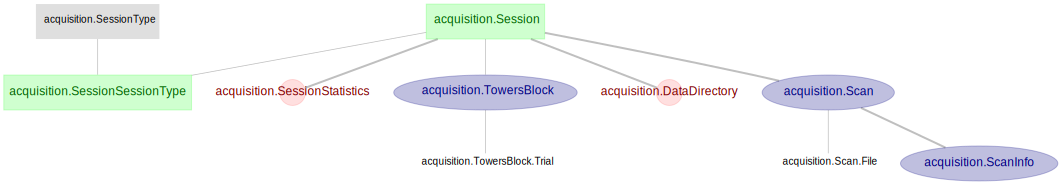

In [2]:
dj.Diagram(acquisition)

Take a look at the table `acquisition.TowersBlock`

In [3]:
acquisition.TowersBlock() # bracket necessary

user_id username,subject_id nickname,session_date date of experiment,session_number number,block block number,task,block_level difficulty level,set_id parameter set id,n_trials number of trials in this block,first_trial trial_idx of the first trial in this block,"block_duration in secs, duration of the block",block_start_time absolute start time of the block,"reward_mil in mL, reward volume in this block",reward_scale scale of the reward in this block,easy_block true if the difficulty reduces during the session,block_performance performance in the current block
ben,B205,2018-06-27,0,1,Towers,4,1,1,1,3916.01,2018-06-27 10:48:00,1.444,1,0,0.963077
ben,B205,2018-06-28,0,1,Towers,4,1,1,1,410.957,2018-06-28 11:40:00,0.128,1,0,0.969697
ben,B205,2018-06-28,0,2,Towers,5,1,1,34,3204.94,2018-06-28 11:47:00,0.9,1,0,0.949367
ben,B205,2018-07-03,0,1,Towers,4,1,1,1,384.343,2018-07-03 11:30:00,0.12,1,0,1.0
ben,B205,2018-07-03,0,2,Towers,6,1,1,31,3434.59,2018-07-03 11:36:00,1.228,1,0,0.950249
ben,B205,2018-07-04,0,1,Towers,4,1,1,1,602.935,2018-07-04 11:14:00,0.2144,1,0,0.909091
ben,B205,2018-07-04,0,2,Towers,7,1,1,45,2917.09,2018-07-04 11:24:00,1.1184,1,0,0.926471
ben,B205,2018-07-05,0,1,Towers,4,1,1,1,455.536,2018-07-05 11:27:00,0.128,1,0,0.878788
ben,B205,2018-07-05,0,2,Towers,7,1,1,34,297.087,2018-07-05 11:34:00,0.084,1,0,0.954545
ben,B205,2018-07-05,0,3,Towers,8,1,1,56,2442.56,2018-07-05 11:39:00,1.2912,1,0,0.948276


There is a field called block_performance, of course we could do this in one line:

In [4]:
# how many blocks for each session?
acquisition.Session.aggr(acquisition.TowersBlock.proj('block_performance'), 
                         avg_performance='avg(block_performance)')

user_id username,subject_id nickname,session_date date of experiment,session_number number,avg_performance calculated attribute
ben,B205,2018-06-27,0,0.9630769491195679
ben,B205,2018-06-28,0,0.9595320522785187
ben,B205,2018-07-03,0,0.9751243889331818
ben,B205,2018-07-04,0,0.9177807569503784
ben,B205,2018-07-05,0,0.9272030591964722
ben,B205,2018-07-06,0,0.6417432427406311
ben,B205,2018-07-07,0,0.6671413878599802
ben,B205,2018-07-11,0,0.7384630044301351
ben,B205,2018-07-12,0,0.7562587559223175
ben,B205,2018-07-13,0,0.6914407014846802


But now let's do it with a computed table, for fun :)

## Create your own schema and tables

The first thing we would like to do is to create a schema with `dj.schema`.  
**Note**: the schema name you create has to either start with your username, which is only accessible by you, Here we use our user_name  

In [9]:
schema = dj.schema('shans_tutorial')

Let's check if the new schema is there:

In [10]:
dj.list_schemas()

['U19_acquisition',
 'U19_action',
 'U19_imaging',
 'U19_lab',
 'U19_reference',
 'U19_subject',
 'U19_task',
 'U19_test',
 'shans_tutorial',
 'test']

Now let's define a **Manual** table to save the result.  
A class created with DataJoint correponds to a table in the database.

In [12]:
@schema
class SessionPerformanceManual(dj.Manual):
    definition = """
    -> acquisition.Session         # each session have an average performance
    ---
    avg_performance:      float   # a final product in this table
    """

Let's take a look at the brand-new table we just created.

In [16]:
acquisition.Session.heading

# 
user_id              : varchar(32)                  # username
subject_id           : char(8)                      # nickname
session_date         : date                         # date of experiment
session_number       : int                          # number
---
session_start_time   : datetime                     # start time
session_end_time=null : datetime                     # end time
location             : varchar(32)                  # 
task                 : varchar(32)                  # 
level                : int                          # difficulty level
set_id               : int                          # parameter set id
stimulus_bank        : varchar(255)                 # path to the function to generate the stimulus
stimulus_commit=""   : varchar(64)                  # git hash for the version of the function
stimulus_set         : tinyint                      # an integer that describes a particular set of stimuli in a trial
ball_squal           : float          

In [14]:
SessionPerformanceManual.heading

# 
user_id              : varchar(32)                  # username
subject_id           : char(8)                      # nickname
session_date         : date                         # date of experiment
session_number       : int                          # number
---
avg_performance      : float                        # a final product in this table

In [17]:
SessionPerformanceManual()

user_id username,subject_id nickname,session_date date of experiment,session_number number,avg_performance a final product in this table


Yes, sure, it's empty. We haven't inserted anything into it.  
Now let's insert the firing rate we just computed into this empty table.  
We need to insert the entry with all fields defined in the table, usually in a format of dictionary.

Let's first compute the performance for one session, let's pick a session:

In [18]:
acquisition.Session.aggr(acquisition.TowersBlock.proj() & 'user_id="edward"',
                         n_sessions='count(*)')

user_id username,subject_id nickname,session_date date of experiment,session_number number,n_sessions calculated attribute
edward,E18,2017-08-03,0,9
edward,E18,2017-08-04,0,10
edward,E18,2017-08-08,0,8
edward,E18,2017-08-09,0,10
edward,E18,2017-08-10,0,10
edward,E18,2017-08-11,0,10
edward,E18,2017-08-12,0,8
edward,E26,2017-08-03,0,10
edward,E26,2017-08-04,0,10
edward,E26,2017-08-08,0,10


This session has 10 blocks:

In [20]:
key = {
    'user_id': 'edward',
    'subject_id': 'E18',
    'session_date': datetime.date(2017, 8, 11),
    'session_number': 0
}

In [21]:
performances = (acquisition.TowersBlock & key).fetch('block_performance')

# create another field in the dictionary key
key['avg_performance'] = np.mean(performances)

In [22]:
key

{'user_id': 'edward',
 'subject_id': 'E18',
 'session_date': datetime.date(2017, 8, 11),
 'session_number': 0,
 'avg_performance': 0.7975}

Now insert it!

In [32]:
SessionPerformanceManual.insert1(key, skip_duplicates=True) # insert1 only works for one entry

Let's check the table again to see what happened:

In [33]:
SessionPerformanceManual()

user_id username,subject_id nickname,session_date date of experiment,session_number number,avg_performance a final product in this table
edward,E18,2017-08-11,0,0.7975


Cool the entry is there!

So we can of course write a for loop to compute all avg performance and insert them one by one, but that's too slow. We can compute the results and insert them all at once! Now let's compare the two senarios.
1. insert one by one
2. insert all together

Let's pick two animals that have the same number of sessions.

In [34]:
subject.Subject.aggr(acquisition.Session.proj(), n_sessions='count(*)') & 'n_sessions=80'

user_id username,subject_id nickname,n_sessions calculated attribute
edward,E78,80
lucas,vg28,80


Subjects E78 and vg28 happen to have the same number of sessions.

In [35]:
# loop through sessions of subject B205 and insert one by one, and compute time
import time
start_time = time.time()

for i_session in (acquisition.Session & 'subject_id="E78"').fetch('KEY'):
    performances = (acquisition.TowersBlock & i_session).fetch('block_performance')
    # create another field in the dictionary key
    avg_performance = np.mean(performances)
    if np.isnan(avg_performance):
        continue
    entry = dict(**i_session, 
                 avg_performance=avg_performance)
    SessionPerformanceManual.insert1(entry)

print("--- %s seconds ---" % (time.time() - start_time))

--- 2.93984317779541 seconds ---


In [37]:
# loop through sessions of subject B3151 and insert all at once as a list of dictionaries!
start_time = time.time()

perf_entries = []
for i_session in (acquisition.Session & 'subject_id="vg28"').fetch('KEY'):
    performances = (acquisition.TowersBlock & i_session).fetch('block_performance')
    # create another field in the dictionary key
    avg_performance = np.mean(performances)
    if np.isnan(avg_performance):
        continue
    entry = dict(**i_session, 
                 avg_performance=avg_performance)
    perf_entries.append(entry)
    
SessionPerformanceManual.insert(perf_entries)
print("--- %s seconds ---" % (time.time() - start_time))

--- 1.4254648685455322 seconds ---


In this way, we will need to remember which clusters has been computed and inserted. If we insert the same entry twice, there will be an error. For example, let's rerun the above cell. We can overcome that problem by add the argument `skip_duplicates=True` inside `.insert()` or `.insert1()`, but it is not a very elegant solution.  
The best approach here is to use a **Computed** table, it has the exact definition as the previous manual table, but with a magic **make** function

In [48]:
@schema
class SessionPerformanceComputed(dj.Computed):
    definition = """
    -> acquisition.Session         # each session have an average performance
    ---
    avg_performance:      float   # a final product in this table
    """
    key_source = acquisition.Session() & 'subject_id="vg28"' # bracket necessary
    def make(self, key): # key is one primary key of the entries in table acquisition.Session
        # fetch the performance for each block
        performances = (acquisition.TowersBlock & key).fetch('block_performance')
        
        # create another field in the dictionary key
        key['avg_performance'] = np.mean(performances)
        self.insert1(key)

And we can `populate` the table.

In [49]:
SessionPerformanceComputed.populate(display_progress=True) 
# first argument could be some restrictor to control the populate

0it [00:00, ?it/s]


In [47]:
SessionPerformanceComputed()

user_id username,subject_id nickname,session_date date of experiment,session_number number,avg_performance a final product in this table
edward,E18,2017-08-11,0,0.7975
edward,E26,2017-10-05,0,0.669129
edward,E26,2017-10-06,0,0.851852
edward,E26,2017-10-11,0,0.484211
edward,E26,2017-10-12,0,0.959302
edward,E26,2017-10-13,0,0.980132
edward,E38,2017-08-21,0,0.662455
edward,E38,2017-08-22,0,0.487577
edward,E38,2017-08-23,0,0.556444
edward,E38,2017-08-24,0,0.607069


**What does `populate` do?** 

It does two major things:  
1. From the table definition, get the keys that needs to computed, which we called `key_source`. By default, it would be the join result of the primary dependent tables minus the once has been computed.  
2. Call `make` function defined in the class, and compute one by one, with each individual key from the `key_source`

Here we still have to insert one by one, which is a bit slow. How do we do the trick of insert all firing rate of clusters in one session together?

We can change the `key_source` by redefining it to a larger scale

In [50]:
@schema
class SessionPerformanceComputedFromSubject(dj.Computed):
    definition = """
    -> acquisition.Session         # each session have an average performance
    ---
    avg_performance:      float   # a final product in this table
    """
    key_source = subject.Subject()
    def make(self, key): # key is one primary key of the entries in table subject.Subject()!

        perf_entries = []
        for i_session in (acquisition.Session & key).fetch('KEY'):
            # fetch performance of each block
            performances = (acquisition.TowersBlock & i_session).fetch('block_performance')
            # create another field in the dictionary key
            avg_performance = np.mean(performances)
            if np.isnan(avg_performance):
                continue
            entry = dict(**i_session, 
                         avg_performance=avg_performance)
            perf_entries.append(entry)
            
        self.insert(perf_entries)

In [51]:
SessionPerformanceComputedFromSubject.populate('subject_id in ("E78", "vg28")', display_progress=True)

100%|██████████| 2/2 [00:02<00:00,  1.42s/it]


## Delete entries and drop a table

In [52]:
(SessionPerformanceManual & 'subject_id="E78"').delete() # any restrictor would work here

About to delete:
`shans_tutorial`.`session_performance_manual`: 80 items
Proceed? [yes, No]: yes
Committed.


In [53]:
SessionPerformanceManual.drop()

`shans_tutorial`.`session_performance_manual` (81 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [54]:
SessionPerformanceComputed.drop()

`shans_tutorial`.`__session_performance_computed` (407 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.


In [55]:
SessionPerformanceComputedFromSubject.drop()

`shans_tutorial`.`__session_performance_computed_from_subject` (160 tuples)
Proceed? [yes, No]: yes
Tables dropped.  Restart kernel.
